In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SalesAnalysis/sales_dataset.csv')

/tmp/ipython-input-612591210.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/SalesAnalysis/sales_dataset.csv')


In [ ]:
data.head(10)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,XL,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [ ]:
data.drop(columns = ['Unnamed: 22','ASIN'], inplace= True)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

/tmp/ipython-input-1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data.isna().sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [ ]:
#Fill NaN values with median of Amount(Amount=0)
data.loc[data['Status'].str.contains('Cancelled', case=False), 'Amount'] = 0

In [ ]:
#What is median
data['Amount'].median()

545.0

In [ ]:
#filling median in place of null values
data['Amount'] = data['Amount'].fillna(data['Amount'].median())

In [ ]:
# Courier Status
data['Courier Status'] = data['Courier Status'].fillna('Not Available')

In [ ]:
# Amount & currency missing
data['currency'] = data['currency'].fillna('INR')

In [ ]:
# Promotion IDs
data['promotion-ids'] = data['promotion-ids'].fillna('No Promotion')

In [ ]:
# Fulfilled By
data['fulfilled-by'] = data['fulfilled-by'].fillna('Unknown')

In [ ]:
data['ship-postal-code'] = data['ship-postal-code'].fillna(data['ship-postal-code'].mode()[0])

In [ ]:
# Shipping details (small missing count)
data[['ship-city','ship-state','ship-country']] = data[['ship-city','ship-state','ship-country']].fillna('Unknown')

In [ ]:
data.isna().sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


# Finding duplicates

In [ ]:
Total_duplicates = data.duplicated().sum()
print("Number of duplicate rows:", Total_duplicates)

Number of duplicate rows: 6


In [ ]:
duplicates = data[data.duplicated()]
print(duplicates)

                  Order ID       Date     Status Fulfilment Sales Channel   \
30652  406-0372545-6086735 2022-04-12  Cancelled     Amazon      Amazon.in   
41283  408-0373839-4433120 2022-04-05  Cancelled     Amazon      Amazon.in   
79836  171-9628368-5329958 2022-05-07  Cancelled     Amazon      Amazon.in   
85782  171-3249942-2207542 2022-05-03    Shipped     Amazon      Amazon.in   
86410  405-8669298-3850736 2022-05-03    Shipped     Amazon      Amazon.in   
98946  407-4853873-4978725 2022-06-22    Shipped     Amazon      Amazon.in   

      ship-service-level    Style              SKU Category Size  ... Qty  \
30652          Expedited   SET197   SET197-KR-NP-L      Set    L  ...   0   
41283          Expedited  JNE3501     JNE3501-KR-M    kurta    M  ...   0   
79836          Expedited    J0329       J0329-KR-L    kurta    L  ...   0   
85782          Expedited   SET323  SET323-KR-NP-XL      Set   XL  ...   1   
86410          Expedited  MEN5025  MEN5025-KR-XXXL    kurta  3XL  ..

In [ ]:
# Checking Order IDs are repeating or not
order_duplicates = data[data.duplicated(subset=['Order ID'])]
print(order_duplicates)

                   Order ID       Date                        Status  \
32      403-4367956-2849158 2022-04-30                       Shipped   
56      404-2262140-4696366 2022-04-30                       Shipped   
74      408-4069830-3819562 2022-04-30                       Shipped   
75      408-4069830-3819562 2022-04-30                       Shipped   
97      405-5257740-5301158 2022-04-30  Shipped - Delivered to Buyer   
...                     ...        ...                           ...   
128853  405-4724097-1016369 2022-06-01  Shipped - Delivered to Buyer   
128887  403-6757403-6097100 2022-05-31                     Cancelled   
128909  407-8519205-5064368 2022-05-31                       Shipped   
128916  403-3035549-4142738 2022-05-31                       Shipped   
128927  404-8878574-4524358 2022-05-31                       Shipped   

       Fulfilment Sales Channel  ship-service-level    Style  \
32         Amazon      Amazon.in          Expedited  JNE3543   
56     

In [ ]:
#Removing All Duplicate values
data = data.drop_duplicates()

In [ ]:
Total_duplicates = data.duplicated().sum()
print("Number of duplicate rows:", Total_duplicates)

Number of duplicate rows: 0


**FINANCIAL PERFORMANCE ANALYSIS**

In [ ]:
data['Months'] = data['Date'].dt.month_name()

In [ ]:
monthly_order = ["March","April", "May", "June"]

In [ ]:
Month_Wise_Sales = data.groupby('Months')['Amount'].sum()
Month_Wise_Sales

,Amount
Months,
April,26278569.62
June,21416318.00
March,95355.00
May,23982071.00


In [ ]:
Month_Wise_Sales = Month_Wise_Sales.reindex(monthly_order)
Month_Wise_Sales

,Amount
Months,
March,95355.00
April,26278569.62
May,23982071.00
June,21416318.00


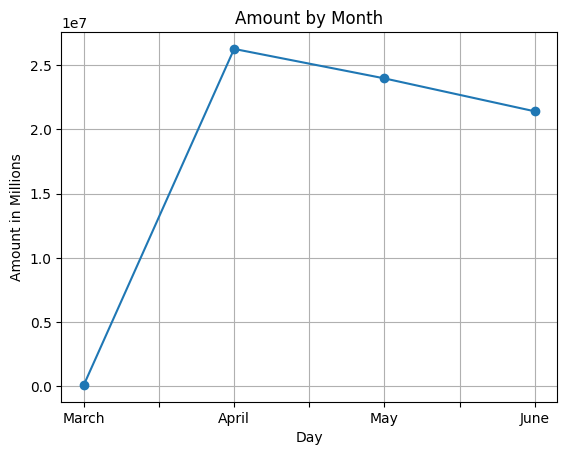

In [ ]:
Month_Wise_Sales.plot(kind = 'line',marker='o')
plt.title('Amount by Month')
plt.xlabel('Day')
plt.ylabel('Amount in Millions')
plt.grid()
plt.show()

In [ ]:
data['day_name'] = data['Date'].dt.day_name()

In [ ]:
day_wise_sales = data.groupby('day_name')['Amount'].sum()
day_wise_sales

,Amount
day_name,
Friday,9861726.00
Monday,10301495.00
Saturday,10302682.62
Sunday,11009906.00
Thursday,9490909.00
Tuesday,10489883.00
Wednesday,10315712.00


In [ ]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [ ]:
day_wise_sales = day_wise_sales.reindex(weekday_order)
day_wise_sales

,Amount
day_name,
Monday,10301495.00
Tuesday,10489883.00
Wednesday,10315712.00
Thursday,9490909.00
Friday,9861726.00
Saturday,10302682.62
Sunday,11009906.00


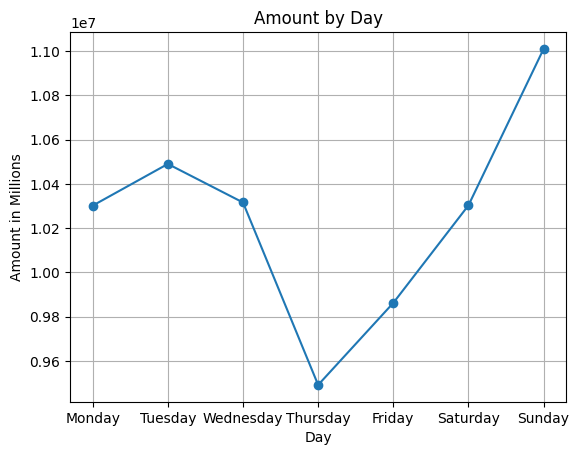

In [ ]:
day_wise_sales.plot(kind = 'line',marker='o')
plt.title('Amount by Day')
plt.xlabel('Day')
plt.ylabel('Amount in Millions')
plt.grid()
plt.show()

**Identifying best-selling products and seasonal sales trends.**

In [ ]:
Best_Product = data.groupby('Category')['Amount'].sum().sort_values(ascending=False)
Best_Product

,Amount
Category,
Set,35777485.14
kurta,19473274.48
Western Dress,10208405.00
Top,4908912.00
Ethnic Dress,732061.00
Blouse,420569.00
Bottom,135998.00
Saree,114694.00
Dupatta,915.00


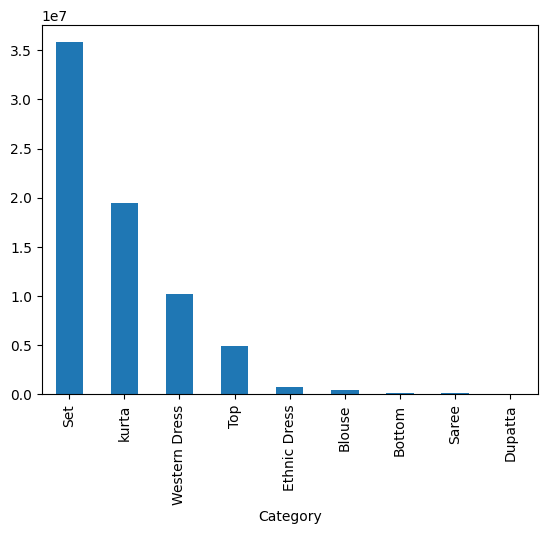

In [ ]:
Best_Product.plot(kind = 'bar')
plt.show()

**Calculating the average order value to understand spending behavior.**

In [ ]:
# Total revenue
total_revenue = data['Amount'].sum()

# Total orders
total_orders = len(data)

# AOV
AOV = total_revenue / total_orders

print("AOV:", round(AOV, 2))

AOV: 556.62


In [ ]:
#Average Order Value Trend Over Time
monthly_aov = (
    data.groupby(data['Date'].dt.to_period('M')).apply(lambda x: x['Amount'].sum() / len(x))
)

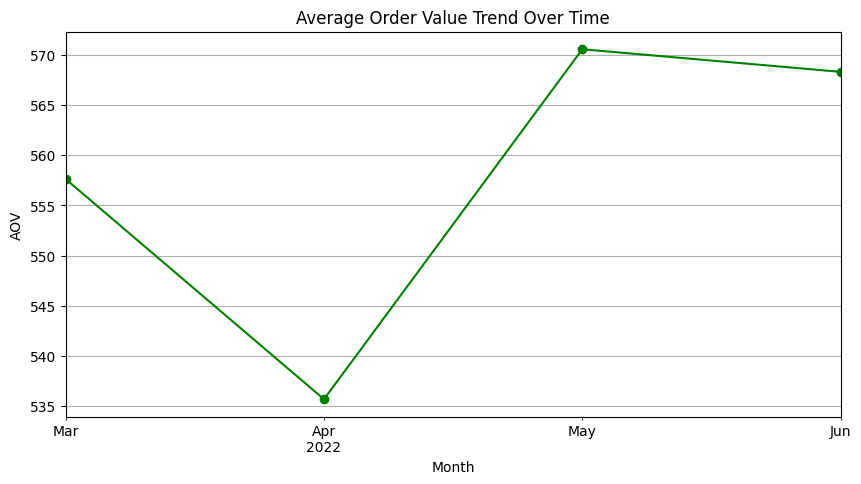

In [ ]:
plt.figure(figsize=(10,5))
monthly_aov.plot(marker='o', color='g')
plt.title("Average Order Value Trend Over Time")
plt.xlabel("Month")
plt.ylabel("AOV")
plt.grid(True)
plt.show()

**CUSTOMER INSIGHTS ANALYSIS**

**Identifying top-performing locations based on sales volume.**

In [ ]:
TOTAL_REVENUE = data['Amount'].sum()
TOTAL_REVENUE

np.float64(71772313.62)

In [ ]:
sales_by_city = data.groupby("ship-city")['Amount'].sum().sort_values(ascending=False).head(10)
sales_by_city

,Amount
ship-city,
BENGALURU,6349713.00
HYDERABAD,4499883.57
MUMBAI,3400494.00
NEW DELHI,3331168.48
CHENNAI,2823610.00
PUNE,2153145.00
KOLKATA,1305113.00
GURUGRAM,1135033.00
THANE,918782.00


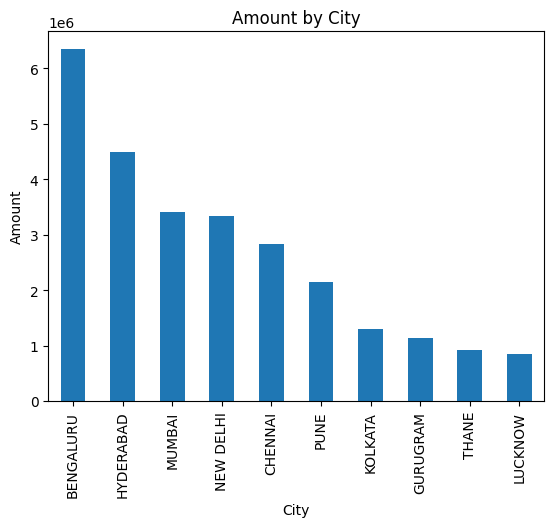

In [ ]:
sales_by_city.plot(kind = 'bar')
plt.title('Amount by City')
plt.xlabel('City')
plt.ylabel('Amount')
plt.show()

In [ ]:
sales_by_state = data.groupby("ship-state")['Amount'].sum().sort_values(ascending=False).head(10)
sales_by_state

,Amount
ship-state,
MAHARASHTRA,12233176.00
KARNATAKA,9648329.00
TELANGANA,6293653.57
UTTAR PRADESH,6184515.00
TAMIL NADU,5958817.00
DELHI,3907340.48
KERALA,3378602.00
WEST BENGAL,3208055.00
ANDHRA PRADESH,2886567.00


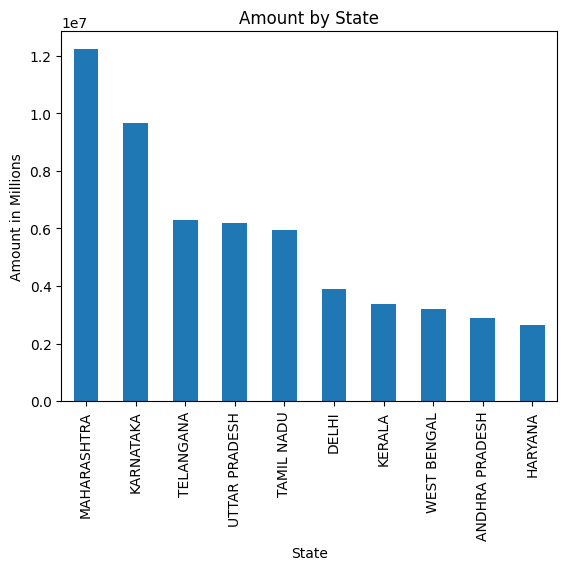

In [ ]:
sales_by_state.plot(kind = 'bar')
plt.title('Amount by State')
plt.xlabel('State')
plt.ylabel('Amount in Millions')
plt.show()

Differentiating B2B vs. B2C customer
 behavior for targeted marketing.


In [ ]:
#Average Order Value by Customer Type
aov_by_customer_type = (data.groupby('B2B').apply(lambda x: x['Amount'].sum() / len(x)).round(2))
aov_by_customer_type = aov_by_customer_type.rename("AOV")
aov_by_customer_type

/tmp/ipython-input-1363685717.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov_by_customer_type = (data.groupby('B2B').apply(lambda x: x['Amount'].sum() / len(x)).round(2))


,AOV
B2B,
False,556.03
True,642.88


In [ ]:
data.loc[data['B2B'] == True,'B2B'] = 'B2B'

/tmp/ipython-input-205574837.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'B2B' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.loc[data['B2B'] == True,'B2B'] = 'B2B'


In [ ]:
data.loc[data['B2B'] == False,'B2B'] = 'B2C'

In [ ]:
C_B = data.B2B.value_counts()
C_B

,count
B2B,
B2C,128072
B2B,871


In [ ]:
labels = ['B2C','B2B']

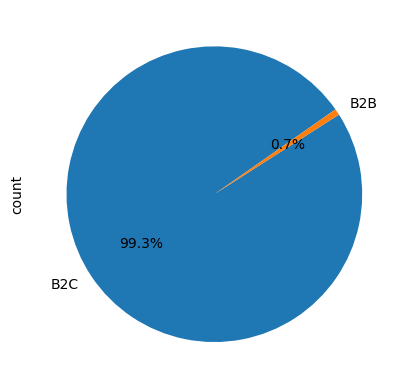

In [ ]:
C_B.plot(kind = 'pie',startangle=35,labels=labels, autopct='%1.1f%%')
plt.show()

Here the value of B2C is 128045
And The value of B2B is 871
So B2C Are faar more than B2B

**Analyzing order cancellation trends and customer retention.**

In [ ]:
cancel_keywords = [
    'cancelled',
    'damaged',
    'lost in transit',
    'rejected by buyer',
    'returned to seller',
    'returning to seller'
]

In [ ]:
total_cancelled_orders = data['Status'].str.lower().str.contains('|'.join(cancel_keywords),na=False).sum()
print(f"Total Cancelled Orders are {total_cancelled_orders}")

Total Cancelled Orders are 20453


In [ ]:
data.Status.value_counts()

,count
Status,
Shipped,77764
Shipped - Delivered to Buyer,28771
Cancelled,18338
Shipped - Returned to Seller,1953
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


In [ ]:
cancel_rate = total_cancelled_orders/len(data) * 100
print(f"Overall Cancel rate {round(cancel_rate,2)}%")

Overall Cancel rate 15.86%


In [ ]:
data['Month'] = data['Date'].dt.to_period('M')
monthly_cancellation = (data.groupby('Month')
.apply(lambda x: x['Status'].str.lower().str.contains('|'.join(cancel_keywords), na=False).sum() / len(data) * 100).round(2))
print(f"Monthly Cancellation {monthly_cancellation}")

Monthly Cancellation Month
2022-03    0.01
2022-04    6.24
2022-05    5.12
2022-06    4.49
Freq: M, dtype: float64


/tmp/ipython-input-2983452723.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Status'].str.lower().str.contains('|'.join(cancel_keywords), na=False).sum() / len(data) * 100).round(2))


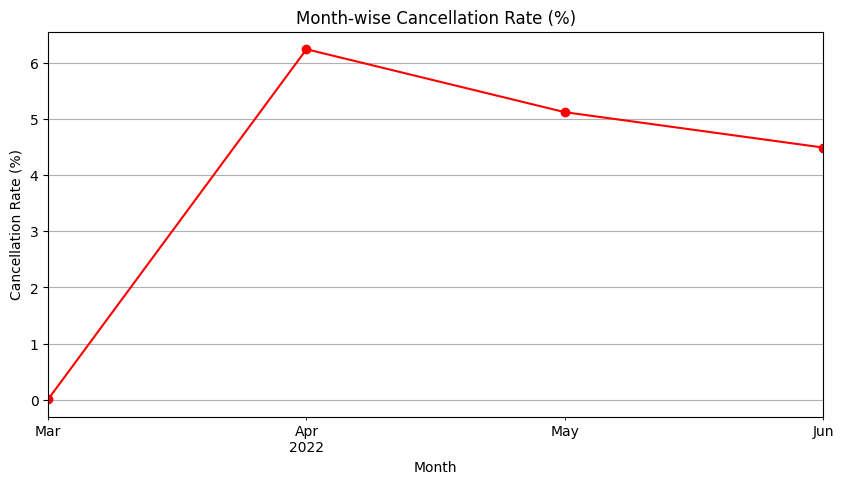

In [ ]:
#Monthly Cancellation Trend
plt.figure(figsize=(10,5))
monthly_cancellation.plot(marker='o', color='red')
plt.title("Month-wise Cancellation Rate (%)")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.grid(True)
plt.show()

So HERE Cancelletion % of Orders is 15.86% % which is not good. We Focus on Giving Good Sevices to Customers.





Customer Retention('How many customers come back and order again')

In [ ]:
order_counts = data['Order ID'].value_counts()
order_counts

,count
Order ID,
403-4984515-8861958,12
171-5057375-2831560,12
403-0173977-3041148,11
404-9932919-6662730,11
408-3317403-1729937,10
...,...
406-7498475-4257161,1
402-2493916-3621929,1
408-5687433-7844314,1


In [ ]:
repeat_customers = (order_counts > 1).sum()
repeat_customers

np.int64(6840)

In [ ]:
total_customers = order_counts.count()
total_customers

np.int64(120352)

In [ ]:
retention_rate = (repeat_customers / total_customers) * 100
retention_rate

np.float64(5.683328901887796)

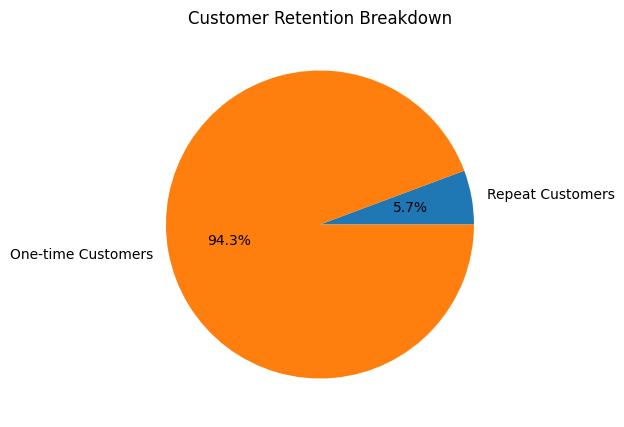

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(
    [repeat_customers, total_customers - repeat_customers],
    labels=['Repeat Customers', 'One-time Customers'],
    autopct='%1.1f%%'
)
plt.title("Customer Retention Breakdown")
plt.show()


**LOGISTICS & FULFILLMENT OPTIMIZATION**

In [ ]:
#Comparing orders fulfilled by Amazon vs. Merchant fulfillment.
total_by_fulfilment = data.Fulfilment.value_counts()
total_by_fulfilment

,count
Fulfilment,
Amazon,89673
Merchant,39270


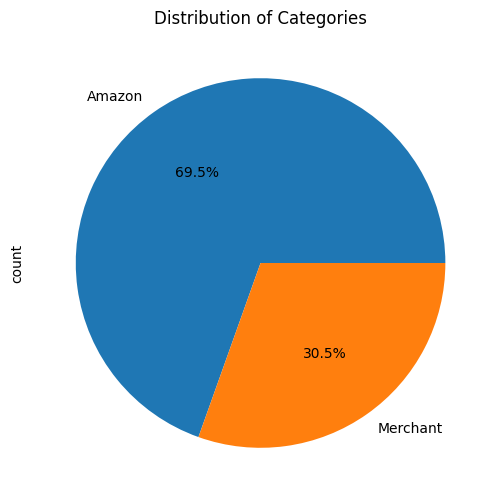

In [ ]:
total_by_fulfilment.plot.pie(figsize=(6, 6),autopct='%1.1f%%')
plt.title('Distribution of Categories')

plt.show()

In [ ]:
#Cancellation Rate by Fulfilment Type
cancel_by_fulfilment = (
    data[data['Status'].str.lower().str.contains('|'.join(cancel_keywords), na=False)]
    .groupby('Fulfilment')['Order ID']
    .count()
)
cancel_by_fulfilment

,Order ID
Fulfilment,
Amazon,11476
Merchant,8977


In [ ]:
# Total orders by Fulfilment type
total_by_fulfilment = (
    data.groupby('Fulfilment')['Order ID']
    .count()
)
total_by_fulfilment

,Order ID
Fulfilment,
Amazon,89673
Merchant,39270


In [ ]:
# Cancellation Rate (%)
cancel_rate_fulfilment = (
    (cancel_by_fulfilment / total_by_fulfilment) * 100
).round(2)

cancel_rate_fulfilment

,Order ID
Fulfilment,
Amazon,12.80
Merchant,22.86


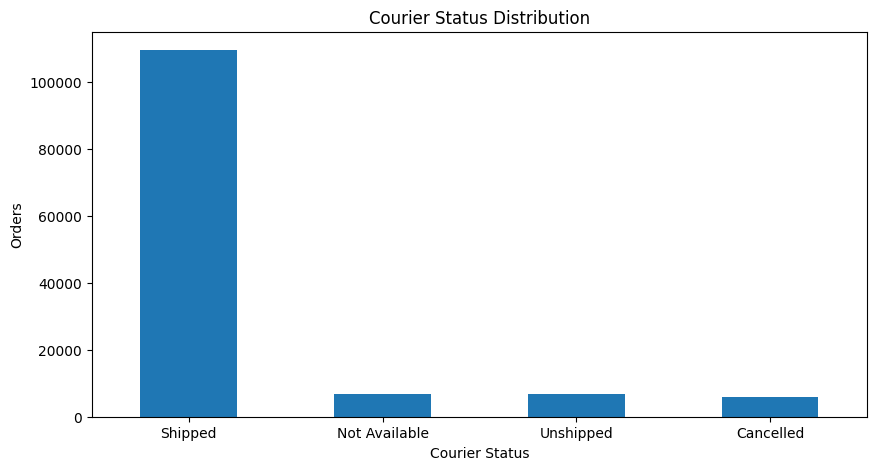

In [ ]:
#Courier Status Analysis
courier_status_dist = data['Courier Status'].value_counts()

plt.figure(figsize=(10,5))
courier_status_dist.plot(kind='bar')
plt.title("Courier Status Distribution")
plt.xlabel("Courier Status")
plt.ylabel("Orders")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Order Status Distribution
status = data['Status'].value_counts()
status

,count
Status,
Shipped,77764
Shipped - Delivered to Buyer,28771
Cancelled,18338
Shipped - Returned to Seller,1953
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


**PRODUCT MANAGEMENT & INVENTORY OPTIMIZATION**

Identifying high-demand product categories.

In [ ]:
Best_Product = data.groupby('Category')['Amount'].sum().sort_values(ascending=False)
Best_Product

,Amount
Category,
Set,35777485.14
kurta,19473274.48
Western Dress,10208405.00
Top,4908912.00
Ethnic Dress,732061.00
Blouse,420569.00
Bottom,135998.00
Saree,114694.00
Dupatta,915.00


In [ ]:
#Demand by Quantity (True Demand)
category_demand_qty = data.groupby('Category')['Qty'].sum().sort_values(ascending=False)
category_demand_qty.head(10)

,Qty
Category,
Set,45286
kurta,45048
Western Dress,13943
Top,9902
Ethnic Dress,1052
Blouse,864
Bottom,398
Saree,152
Dupatta,3


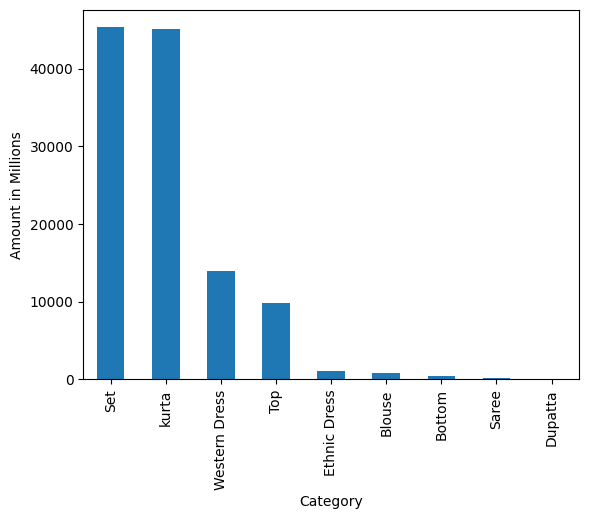

In [ ]:
category_demand_qty.plot(kind = 'bar')
plt.ylabel('Amount in Millions')
plt.show()

 Analyzing the average quantity ordered for efficient stock management.

In [ ]:
#Average Quantity per Order
avg_qty_per_order = data['Qty'].sum() / len(data)

print("Average Quantity per Order:", round(avg_qty_per_order, 2))

Average Quantity per Order: 0.9


Enhancing inventory control to prevent stockouts or overstocking.

In [ ]:
#Demand Variability by Category
demand_variability = data.groupby('Category')['Qty'].std().sort_values(ascending=False)
demand_variability.head(10)

,Qty
Category,
Blouse,0.561705
Saree,0.359976
Bottom,0.323671
kurta,0.320904
Western Dress,0.313270
Set,0.312124
Ethnic Dress,0.297348
Top,0.265805
Dupatta,0.000000


**CUSTOMER SATISFACTION & RETURNS**

 Identifying problematic
 products/categories to enhance quality.

In [ ]:
low_sales_products = (data.groupby('Category')['Amount'].sum().sort_values())
low_sales_products.head(10)

,Amount
Category,
Dupatta,915.00
Saree,114694.00
Bottom,135998.00
Blouse,420569.00
Ethnic Dress,732061.00
Top,4908912.00
Western Dress,10208405.00
kurta,19473274.48
Set,35777485.14


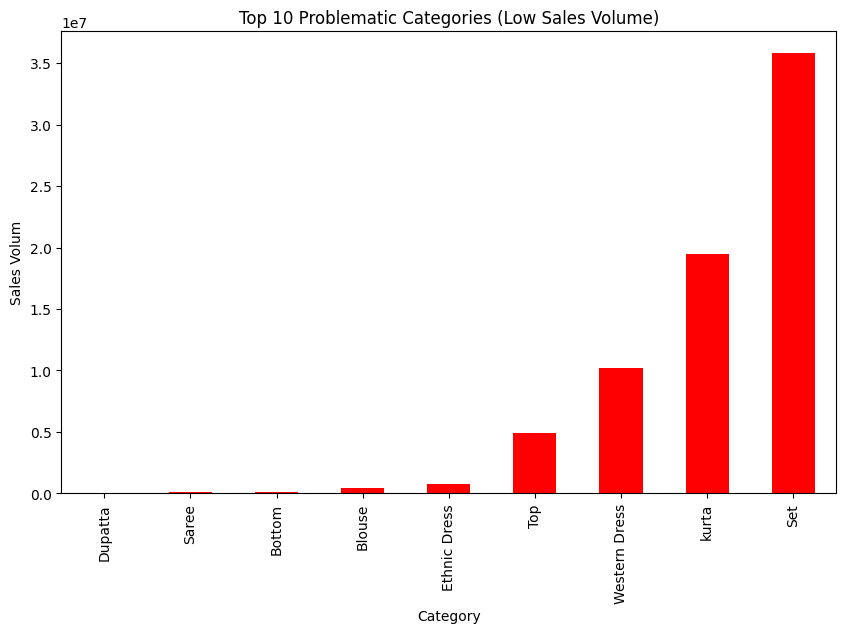

In [ ]:
plt.figure(figsize=(10,6))
low_sales_products.plot.bar(color='red')
plt.title("Top 10 Problematic Categories (Low Sales Volume)")
plt.xlabel("Category")
plt.ylabel("Sales Volum")
plt.show()

In [ ]:
#Cancellation Rate by Category
cancellation_by_category = (
    data.groupby('Category')
      .apply(lambda x:
             x['Status'].str.lower().str.contains(
                 '|'.join(cancel_keywords), na=False
             ).sum() / len(data) * 100
            )
      .round(2)
)

cancellation_by_category

/tmp/ipython-input-1434826453.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x:


,0
Category,
Blouse,0.10
Bottom,0.05
Dupatta,0.00
Ethnic Dress,0.13
Saree,0.02
Set,6.35
Top,1.09
Western Dress,1.92
kurta,6.21


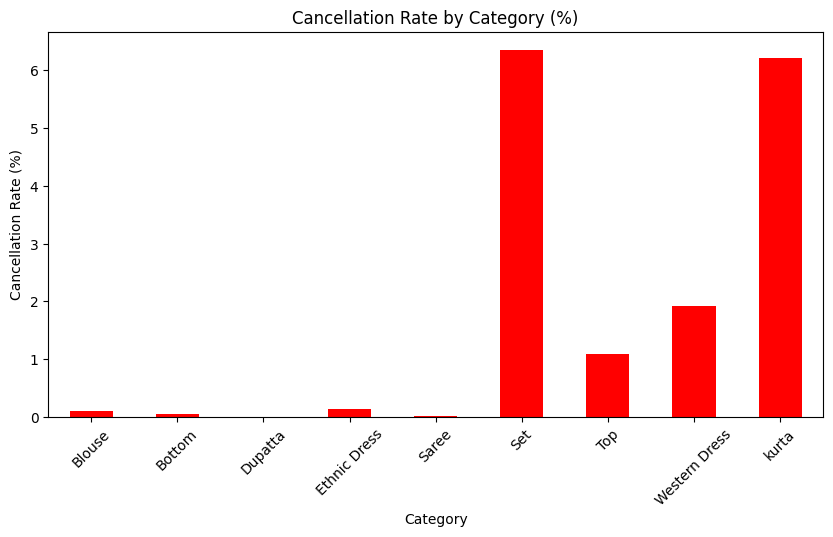

In [ ]:
#Chat for Cancellation Rate by Category
cancellation_by_category.plot(kind='bar', figsize=(10,5), color='red')
plt.title("Cancellation Rate by Category (%)")
plt.xlabel("Category")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
category_return_rate = (data.groupby('Category')['Status'].
                        apply(lambda x: (x == 'Shipped - Returned to Seller').
mean() * 100).sort_values(ascending=False))
category_return_rate


,Status
Category,
Western Dress,2.026460
Set,1.523711
kurta,1.433900
Ethnic Dress,1.381693
Blouse,1.295896
Top,1.167498
Bottom,1.136364
Saree,0.609756
Dupatta,0.000000


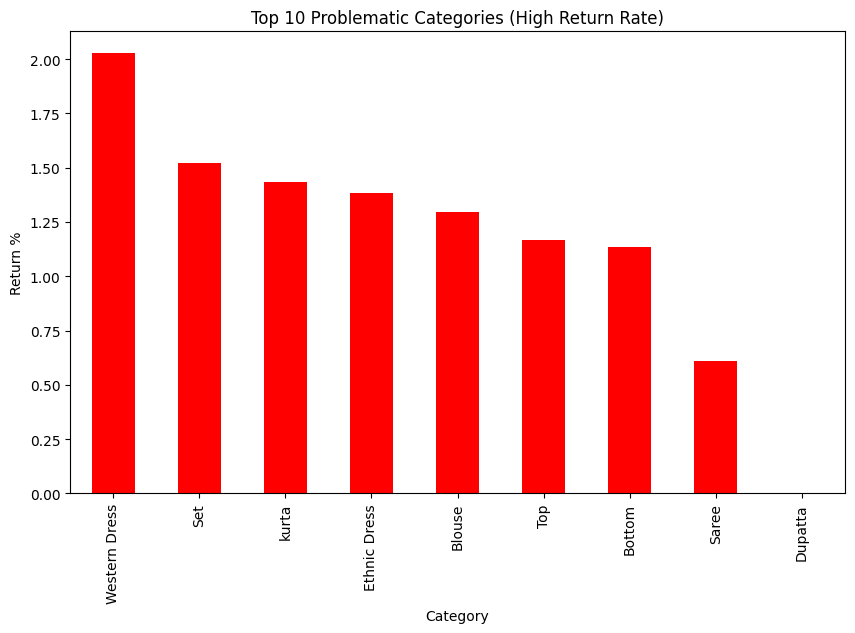

In [ ]:
plt.figure(figsize=(10,6))
category_return_rate.plot.bar(color='red')
plt.title("Top 10 Problematic Categories (High Return Rate)")
plt.xlabel("Category")
plt.ylabel("Return %")
plt.show()

**Conclusion**

 * Revenue is highly concentrated, with 90% of sales from four products, led by Sets (49.83%) and Kurta (27.26%), while other categories underperform. Revenue peaked at ₹26.5M in April but declined 23.25% by June, indicating operational issues.

* Maharashtra and Karnataka contribute 30.8% of total revenue, showing strong regional concentration.

* Key risks include high cancellations (>10%) and low repeat customers (5.7%), while a 6.13% weekend sales uplift presents a clear growth opportunity.

**Recommended Next Steps**

**Analyze revenue decline (April–June)**

 * Investigate the root causes behind the 23.25% revenue drop, including pricing changes, demand shifts, supply issues, or marketing gaps.

**Stabilize short-term performance**

 * Take corrective actions such as improving inventory availability, optimizing pricing, and tightening order fulfillment processes.

**Improve customer retention**

 * Launch loyalty programs to reward repeat customers.

 * Use personalized offers and recommendations based on purchase behavior.

**Increase repeat purchase rate**

 * Set a target to push repeat purchases beyond 15% by tracking cohort behavior and retention KPIs.

**Support long-term revenue growth**

* Continuously monitor retention, cancellations, and revenue trends to ensure sustainable growth over time.